# The Dataset: Immigration to USA from 1980 to 2013

This dataset is from the United Nations Department of Economic and Social Affairs. They track immigration from most countries in the World. This notebook is a focus on immigration to the USA through the use of charts and graphs. Mostly informational not too much analysis, more a practice of charting in Matplotlib.

Source: http://www.un.org/en/development/desa/population/migration/data/empirical2/migrationflows.shtml

In [1]:
# import modules and libraries
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.style.use(['ggplot'])
%matplotlib inline

from wordcloud import WordCloud, STOPWORDS
from PIL import Image

## Import, Refine & Review the data

In [2]:
# import the data
df_us = pd.read_excel(
'United States of America.xlsx', 
sheet_name = "USA by Place of birth", 
skiprows=range(20))

In [3]:
df_us.head(2)

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Less developed regions,722,...,2137,4749,3417,1753,2813,3165,2017,1648,1617,2196
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,More developed regions,30,...,3840,5947,7914,5737,5754,5137,4711,3612,3364,3186


In [4]:
df_us.tail(2)

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
219,Immigrants,Foreigners,Unknown,999,World,999,World,999,World,14597,...,17285,23565,24541,20120,19972,19488,16453,13740,9729,11698
220,Immigrants,Foreigners,Total,999,World,999,World,999,World,530639,...,957883,1122257,1266129,1052415,1107126,1130818,1042625,1062040,1031631,990553


In [5]:
# check for nulls - there are none
# df_us.isnull().sum()

In [6]:
#df_us.dtypes
# they checked out

In [7]:
# drop unecessary columns
df_us.drop(['AREA','REG','DEV','Type','Coverage'], axis=1, inplace=True)
df_us.head(2)

,OdName,AreaName,RegName,DevName,1980,1981,1982,1983,1984,1985,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Afghanistan,Asia,Southern Asia,Less developed regions,722,1881,1569,2566,3222,2794,...,2137,4749,3417,1753,2813,3165,2017,1648,1617,2196
1,Albania,Europe,Southern Europe,More developed regions,30,11,23,22,32,45,...,3840,5947,7914,5737,5754,5137,4711,3612,3364,3186


In [8]:
# rename columns
df_us.rename(columns={'OdName':'Country', 'AreaName':'Continent', 'RegName':'Region'}, inplace=True)
df_us.head(2)

,Country,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Afghanistan,Asia,Southern Asia,Less developed regions,722,1881,1569,2566,3222,2794,...,2137,4749,3417,1753,2813,3165,2017,1648,1617,2196
1,Albania,Europe,Southern Europe,More developed regions,30,11,23,22,32,45,...,3840,5947,7914,5737,5754,5137,4711,3612,3364,3186


In [9]:
# add a total column
df_us['Total'] = df_us.sum(axis=1)

In [10]:
df_us.head(2)

,Country,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
0,Afghanistan,Asia,Southern Asia,Less developed regions,722,1881,1569,2566,3222,2794,...,4749,3417,1753,2813,3165,2017,1648,1617,2196,74430
1,Albania,Europe,Southern Europe,More developed regions,30,11,23,22,32,45,...,5947,7914,5737,5754,5137,4711,3612,3364,3186,87380


In [11]:
df_us.tail(2)

,Country,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
219,Unknown,World,World,World,14597,13018,28535,25027,21946,21795,...,23565,24541,20120,19972,19488,16453,13740,9729,11698,745042
220,Total,World,World,World,530639,596600,594131,559763,543903,570009,...,1122257,1266129,1052415,1107126,1130818,1042625,1062040,1031631,990553,30536689


In [12]:
# getting the total row into a seperate df
df_tot_year = df_us[df_us['Country']== 'Total']

In [13]:
# drop the last row (the totals) - this would impact the aanalysis
df_us = df_us[:-1]

In [14]:
df_us.tail(2)

,Country,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
218,Zimbabwe,Africa,Eastern Africa,Less developed regions,246,167,162,193,200,222,...,923,1049,1057,953,983,1274,1016,914,924,16179
219,Unknown,World,World,World,14597,13018,28535,25027,21946,21795,...,23565,24541,20120,19972,19488,16453,13740,9729,11698,745042


In [15]:
df_us.describe()

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,2.200000e+02
mean,2411.995455,2711.818182,2700.595455,2544.377273,2472.286364,2590.950000,2735.036364,2734.163636,2922.840909,4958.745455,...,5101.168182,5755.131818,4783.704545,5032.390909,5140.081818,4739.204545,4827.454545,4689.231818,4502.513636,1.388031e+05
std,6942.768577,9232.926950,8353.889714,7193.443374,6962.914122,7310.115945,7848.798147,7890.440590,9025.216278,28296.517533,...,14701.443506,15936.073010,13914.497171,15940.832083,14412.213333,13346.677131,13872.637674,13635.920373,12767.310996,4.771115e+05
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000e+00
25%,5.750000,4.000000,5.000000,5.000000,2.000000,1.000000,2.000000,3.750000,2.750000,7.000000,...,53.000000,71.500000,54.500000,64.750000,66.750000,70.500000,70.500000,79.750000,73.000000,1.588750e+03
50%,154.000000,134.000000,126.000000,128.000000,123.000000,124.500000,135.500000,138.000000,145.000000,142.000000,...,836.000000,990.000000,794.500000,770.500000,833.000000,776.500000,751.000000,772.500000,836.000000,2.062300e+04
75%,1194.250000,1291.000000,1398.750000,1504.000000,1413.000000,1355.250000,1430.250000,1437.750000,1380.750000,1920.500000,...,3792.000000,4098.500000,3485.750000,3600.000000,3602.500000,3506.500000,3311.500000,3022.000000,3082.500000,8.522525e+04
max,56680.000000,101268.000000,72553.000000,59079.000000,57557.000000,61077.000000,66533.000000,72351.000000,95039.000000,405172.000000,...,161445.000000,173749.000000,148640.000000,189989.000000,164920.000000,139120.000000,143446.000000,146406.000000,135028.000000,6.078548e+06


In [16]:
# convert column names into strings
df_us.columns = list(map(str, df_us.columns))
df_us.head(2)

,Country,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
0,Afghanistan,Asia,Southern Asia,Less developed regions,722,1881,1569,2566,3222,2794,...,4749,3417,1753,2813,3165,2017,1648,1617,2196,74430
1,Albania,Europe,Southern Europe,More developed regions,30,11,23,22,32,45,...,5947,7914,5737,5754,5137,4711,3612,3364,3186,87380


In [17]:
# export for Tableau
df_us.to_csv('df_us_un_immigration.csv')

In [18]:
df_us.set_index('Country', inplace=True)

In [19]:
df_us.tail(2)

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Zimbabwe,Africa,Eastern Africa,Less developed regions,246,167,162,193,200,222,221,...,923,1049,1057,953,983,1274,1016,914,924,16179
Unknown,World,World,World,14597,13018,28535,25027,21946,21795,19788,...,23565,24541,20120,19972,19488,16453,13740,9729,11698,745042


## Charts and Graphs

In [20]:
# And what was the total immigration from 1980 to 2013?
total_immigration = df_us['Total'].sum()
total_immigration

30536689

In [21]:
# lets view the totals by year over time
years = list(map(str, range(1980, 2014))) # select only the years

df_tot_year

,Country,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
220,Total,World,World,World,530639,596600,594131,559763,543903,570009,...,1122257,1266129,1052415,1107126,1130818,1042625,1062040,1031631,990553,30536689


In [22]:
df_tot_year.set_index('Country', inplace=True)
df_tot_year.drop(['Continent', 'Region', 'DevName', 'Total'], axis=1, inplace=True)
df_tot_year = df_tot_year.transpose()

In [23]:
df_tot_year.head(2)

Country,Total
1980,530639
1981,596600


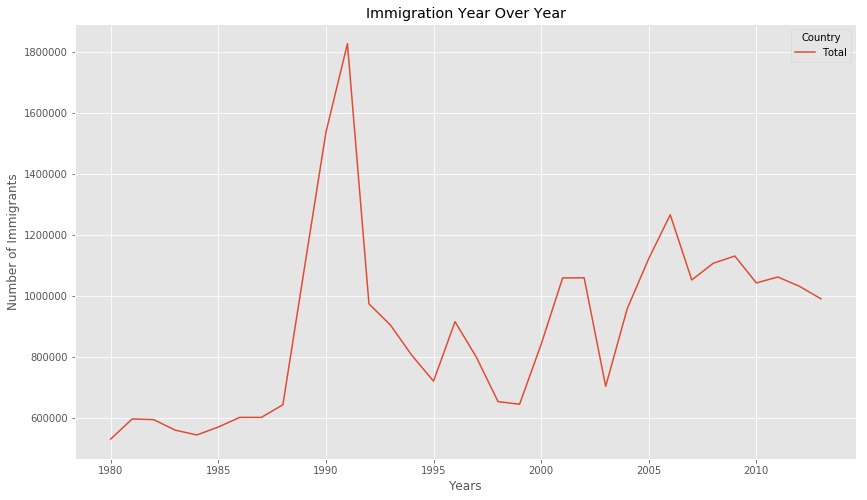

In [24]:
df_tot_year.index = df_tot_year.index.map(int) # let's change the index values of df_CI to type integer for plotting
df_tot_year.plot(kind='line', figsize=(14, 8))

plt.title('Immigration Year Over Year')
plt.ylabel('Number of Immigrants')
plt.xlabel('Years')

plt.show()

#### In 30+ years 30,536,689 people immigrated to the US.  Immigration peaked in 1991 at 1,800,000. For the past 15 years has ranged between 800,000 and 1,200,000 per year.

### Word Cloud of top Countries

Using countries with single-word names, let's duplicate each country's name based on how much they contribute to the total immigration.

In [25]:
max_words = 20000
word_string = ''
for country in df_us.index.values:
    # check if country's name is a single-word name
    if len(country.split(' ')) == 1:
        repeat_num_times = int(df_us.loc[country, 'Total']/float(total_immigration)*max_words)
        word_string = word_string + ((country + ' ') * repeat_num_times)
                                     
# display the generated text
#word_string

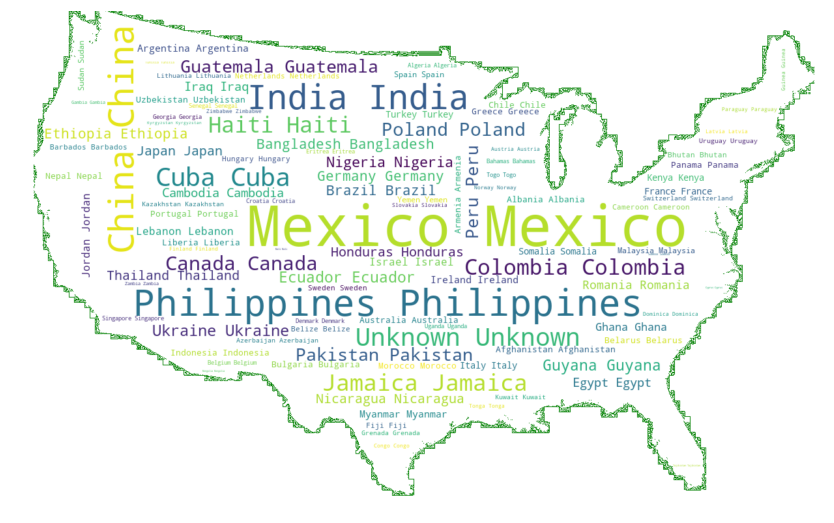

In [37]:
usa_mask = np.array(Image.open('usa_mask.png'))

# instantiate a word cloud object
usa_wc = WordCloud(background_color='white', max_words=2000, mask=usa_mask, contour_width=.5, contour_color='green')

# generate the word cloud
usa_wc.generate(word_string)

# display the word cloud
fig = plt.figure()
fig.set_figwidth(14) # set width
fig.set_figheight(18) # set height

plt.imshow(usa_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

### Bar Chart of top 15 countries

In [27]:
df_us.sort_values(by='Total', ascending=True, inplace=True)
df_top15 = df_us['Total'].tail(15)
df_top15

Country
Canada                                                   477123
United Kingdom of Great Britain and Northern Ireland     483229
Colombia                                                 582569
Haiti                                                    607433
Jamaica                                                  646670
El Salvador                                              743993
Unknown                                                  745042
Cuba                                                     772908
Republic of Korea                                        830641
Dominican Republic                                      1067939
Viet Nam                                                1261426
India                                                   1533776
China                                                   1625912
Philippines                                             1798872
Mexico                                                  6078548
Name: Total, dtype: int64

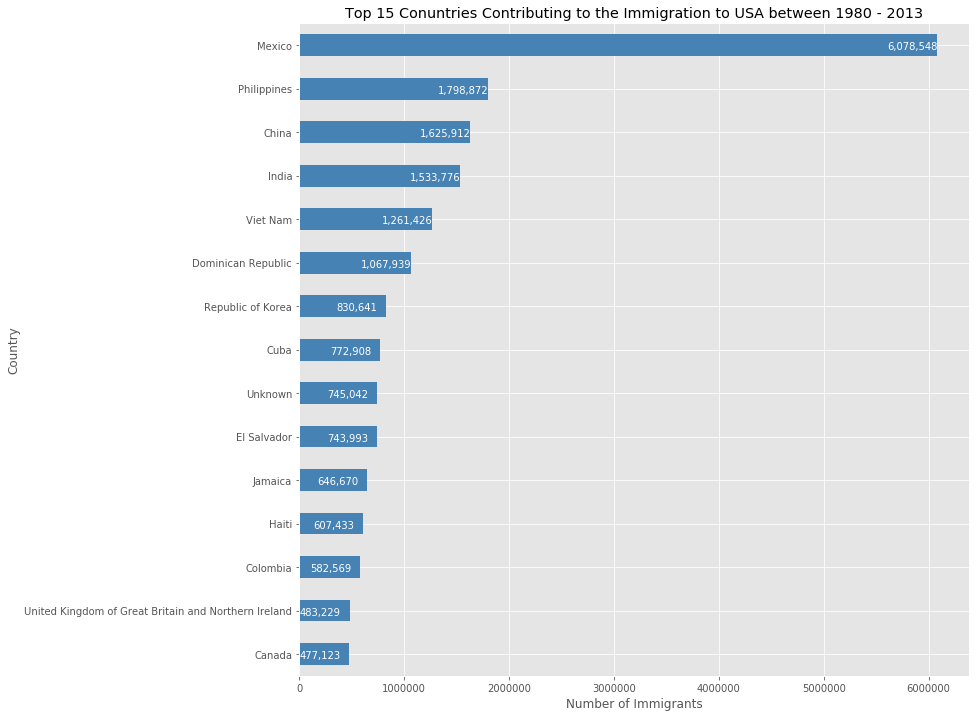

In [28]:
df_top15.plot(kind='barh', figsize=(12, 12), color='steelblue')
plt.xlabel('Number of Immigrants')
plt.title('Top 15 Conuntries Contributing to the Immigration to USA between 1980 - 2013')

for index, value in enumerate(df_top15): 
    label = format(int(value), ',') # format int with commas
    
    # place text at the end of bar (subtracting 47000 from x, and 0.1 from y to make it fit within the bar)
    plt.annotate(label, xy=(value - 477000, index - 0.10), color='white')
    
plt.show()

#### Mexico has by far the most immigrants to the US. I was surprised at the Philippines coming in at number 2, which was followed by China and India. Viet Nam Rounded out the top 5.

## Line Chart of top five over time

In [29]:
# top five countries
df_us.sort_values(by='Total', ascending=False, axis=0, inplace=True)
df_top5 = df_us.head(5)
df_top5 = df_top5[years].transpose() 
df_top5.head()

Country,Mexico,Philippines,China,India,Viet Nam
1980,56680,42316,27651,22607,43483
1981,101268,43772,25803,21522,55631
1982,56106,45102,27100,21738,72553
1983,59079,41546,25777,25451,37560
1984,57557,42768,23363,24964,37236


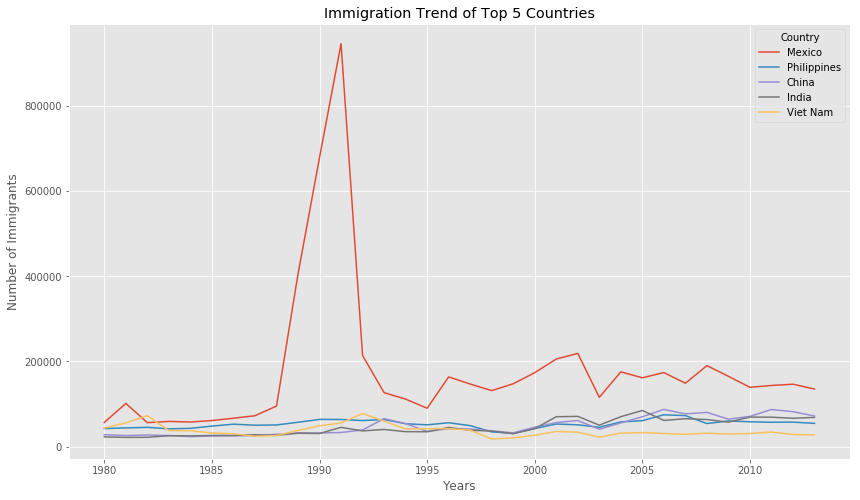

In [30]:
df_top5.index = df_top5.index.map(int) # change years to integers to show up in line chart
df_top5.plot(kind='line', figsize=(14, 8)) # pass a tuple (x, y) size

plt.title('Immigration Trend of Top 5 Countries')
plt.ylabel('Number of Immigrants')
plt.xlabel('Years')
plt.show()

#### Wow, look at that spike from Mexico on the early 90's, which leveled off after 1995. Without going too far down a rabbit hole I wonder if the Immigration Act of 1990 contributed to the spike. Further analysis needed. 

### Not a huge fan but an Area Chart does a decent job of visualizing the trends. 

Text(0.5,0,'Years')

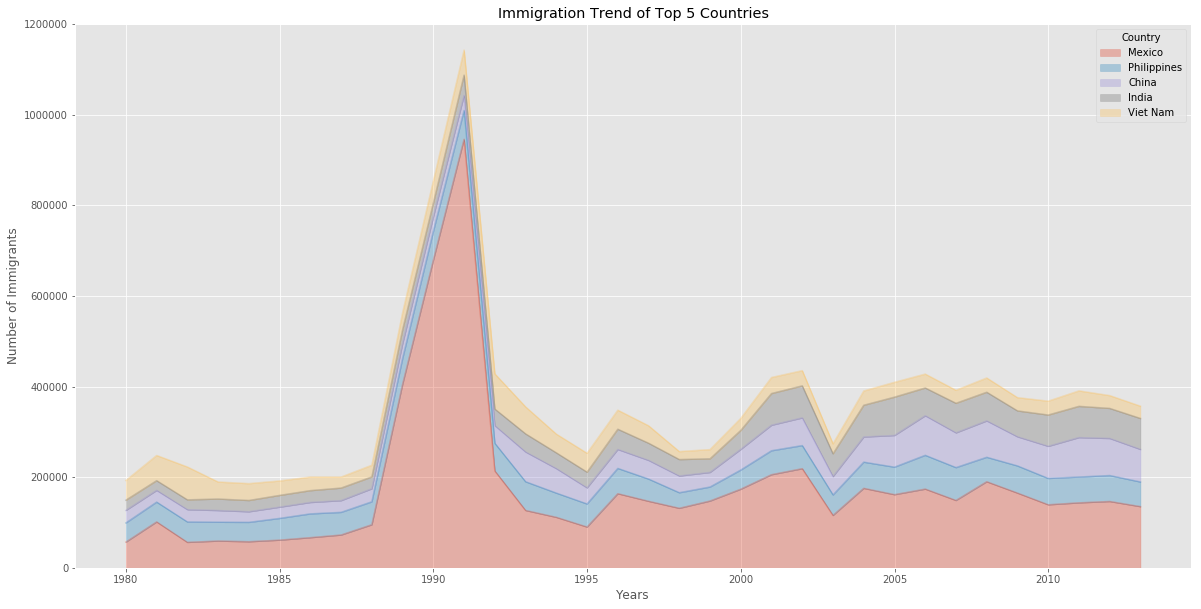

In [31]:
ax = df_top5.plot(kind='area', alpha=0.35, figsize=(20, 10))

ax.set_title('Immigration Trend of Top 5 Countries')
ax.set_ylabel('Number of Immigrants')
ax.set_xlabel('Years')

### Same Charts as above, I just removed Mexico to see the trends of the other top countries. 

In [32]:
# remove mexico
df_us.sort_values(by='Total', ascending=False, axis=0, inplace=True)
df_top5 = df_us.head(5)
df_top5_ex_mex = df_top5.iloc[1:]
df_top5_ex_mex = df_top5_ex_mex[years].transpose() 

df_top5_ex_mex.head()

Country,Philippines,China,India,Viet Nam
1980,42316,27651,22607,43483
1981,43772,25803,21522,55631
1982,45102,27100,21738,72553
1983,41546,25777,25451,37560
1984,42768,23363,24964,37236


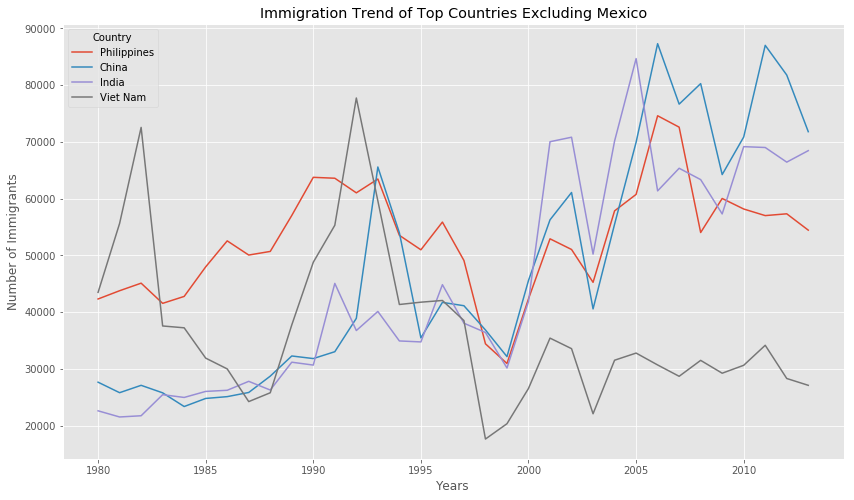

In [33]:
df_top5_ex_mex.index = df_top5_ex_mex.index.map(int) # change years to integers to show up
df_top5_ex_mex.plot(kind='line', figsize=(14, 8)) # pass a tuple (x, y) size

plt.title('Immigration Trend of Top Countries Excluding Mexico')
plt.ylabel('Number of Immigrants')
plt.xlabel('Years')
plt.show()

Text(0.5,0,'Years')

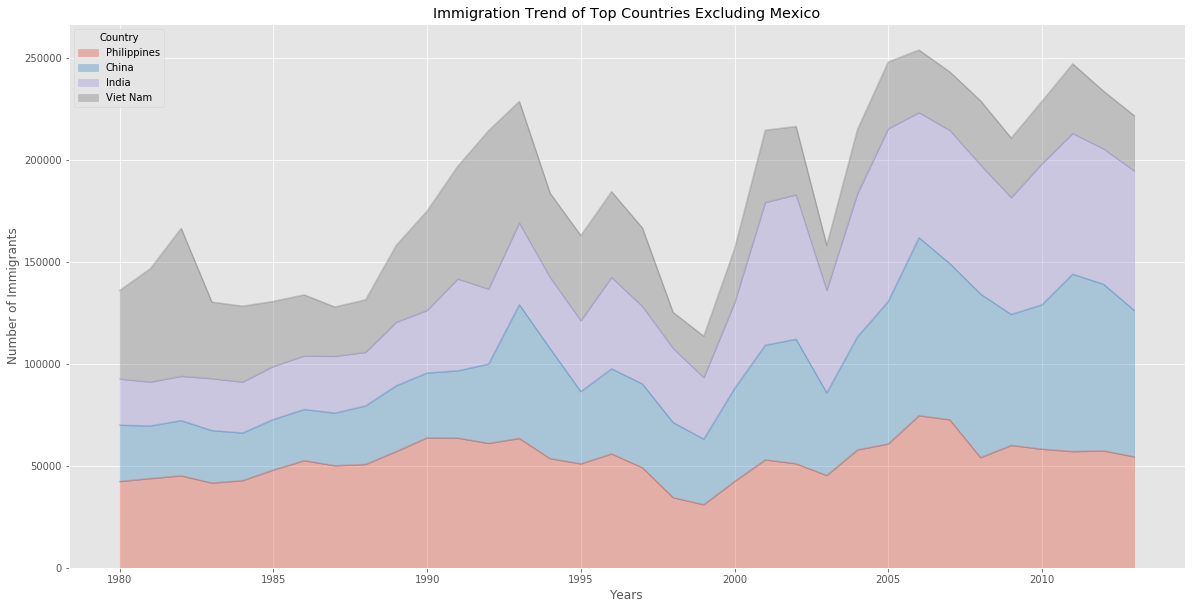

In [34]:
ax = df_top5_ex_mex.plot(kind='area', alpha=0.35, figsize=(20, 10))

ax.set_title('Immigration Trend of Top Countries Excluding Mexico')
ax.set_ylabel('Number of Immigrants')
ax.set_xlabel('Years')

### rest of the analysis is created in Tableau